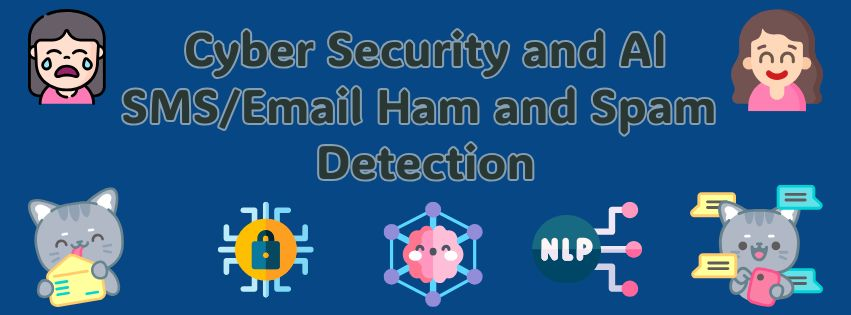

# 🛡️ Defending Cyberspace: The Quest to Combat Spam with Machine Learning and AI 📧💥


SMS and email spam detection 🛡️ is paramount in cybersecurity to shield users from phishing 🎣, malware 🦠, and fraud 💸 threats. Leveraging machine learning 🤖 and artificial intelligence 🧠, automated analysis of message content, sender behavior, and metadata enables accurate identification and filtering of spam, fortifying cybersecurity defenses and preserving user privacy and security.

# 💾 SMS Spam Collection
The SMS Spam Collection is a public set of SMS labeled messages that have been collected for mobile phone spam research.

dataset: https://archive.ics.uci.edu/dataset/228/sms+spam+collection

# 👇 Use Dataset in Google Drive
[get the sms Dataset for this project](https://drive.google.com/drive/folders/1Tb2eN400U6tq2SxGrxv8Va77Z-z-wn7R?usp=sharing)

# 📮 Spam Detection with Perceptrons

**😏Apache SpamAssassin** is an open-source spam filter renowned as the top choice for enterprise-level email protection. It employs a comprehensive scoring system and various heuristic and statistical tests, including Bayesian filtering and DNS blocklists, to identify and block spam emails effectively. With its flexible and easy-to-extend architecture, SpamAssassin seamlessly integrates into various email systems, offering robust protection against unsolicited bulk email.

### 🧠 Perceptrons in Neural Network


In neural networks, a perceptron 🧠 is a fundamental building block, acting as a single artificial neuron that processes input data and produces an output based on weighted connections and an activation function. It serves as the basic unit for information processing in neural networks, mimicking the functionality of biological neurons.

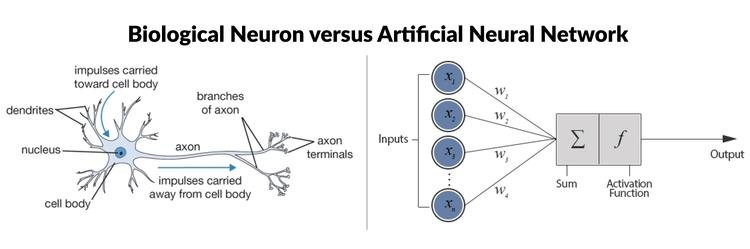

# 📬 Spam Filtering

Spam filtering is like sorting through your mail: you want to separate the junk mail (spam) from the important stuff (ham). It's done by looking at different parts of an email, like who sent it and what it says. Classification means deciding if an email is junk (spam) or not (ham), usually using a computer program that learns from examples of both types of emails.

Spam filtering with machine learning: automatically distinguishing unwanted emails (spam) from legitimate ones (ham) based on patterns and characteristics.

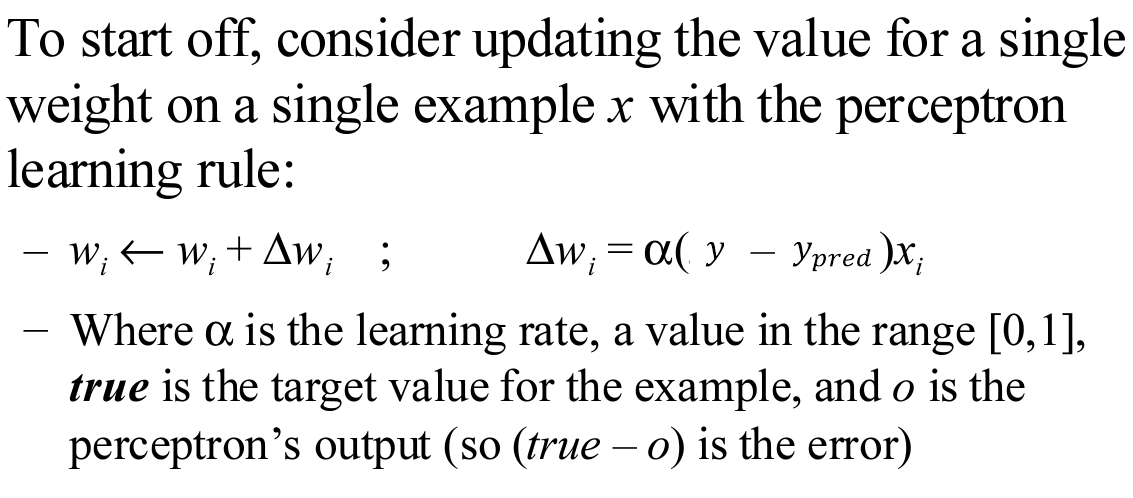

In [61]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ✳️ Import Libraries

In [62]:
#Dataframe
import pandas as pd
#mathmatical computation
import numpy as np
#data splitting
from sklearn.model_selection import train_test_split
#perceptron model
from sklearn.linear_model import Perceptron
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
#model accuracy
from sklearn.metrics import accuracy_score
#confusion metrics
from sklearn.metrics import confusion_matrix



In [63]:
#dataset

df = pd.read_csv("/content/drive/MyDrive/CyberSecurity with AI /datasets-email spam and phishing/sms_spam_perceptron.csv")
df.head(5)

,type,sex,buy
0,ham,0,1
1,ham,0,1
2,ham,1,1
3,spam,1,0
4,ham,0,1


In [64]:
#Features
X = df.drop(['type'], axis = 1)
print(f'shape of features X: {X.shape}')
#target and change to numeric
y = df['type'].replace({'ham': 0, 'spam': 1})
print(f'counts of target class y: {y.value_counts()} ')

shape of features X: (99, 2)
counts of target class y: type
0    75
1    24
Name: count, dtype: int64 


Perceptron:👉 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

In [65]:
#data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 42, stratify=y)

print(f'counts of target class y: {y_train.value_counts()} ')
print(f'counts of target class y: {y_test.value_counts()} ')

counts of target class y: type
0    52
1    17
Name: count, dtype: int64 
counts of target class y: type
0    23
1     7
Name: count, dtype: int64 


In [66]:
#build model
#max_iter aka epochs and eta0 aka learning rate
p = Perceptron(max_iter = 40, eta0 = 0.1, random_state = 42)
p.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=42)

In [67]:
#prediction
y_pred = p.predict(X_test)
print(f"predicted value(y_pred) of X_test data/n: {y_pred}")

predicted value(y_pred) of X_test data/n: [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [68]:
#evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'misclassified samples: {(y_test!=y_pred).sum()}')
print(f'Accuracy of test data: {accuracy:.2%}')

misclassified samples: 5
Accuracy of test data: 83.33%


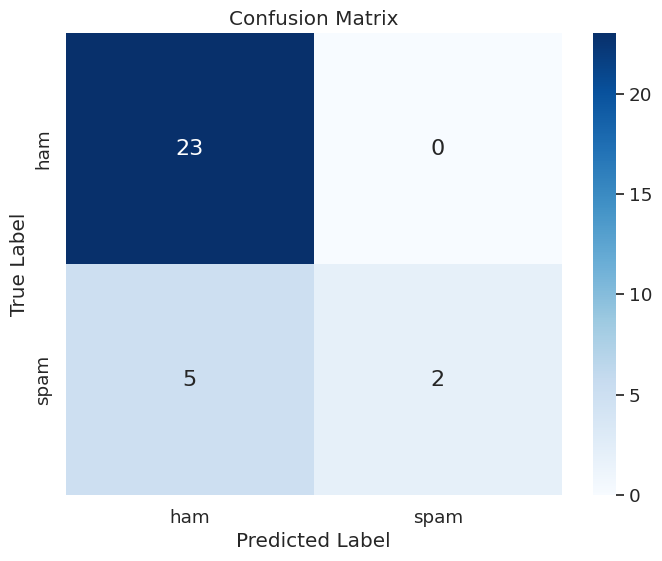

In [69]:
# Mapping dictionary for integer labels to categories
label_map = {0: "ham", 1: "spam"}

# Replace integer labels with categories for y_test and y_pred
y_test_categories = np.array([label_map[label] for label in y_test])
y_pred_categories = np.array([label_map[label] for label in y_pred])

# Get unique classes from true and predicted labels and convert them to a list of strings
classes = np.unique(np.concatenate((y_test_categories, y_pred_categories)))

# Compute confusion matrix
cm = confusion_matrix(y_test_categories, y_pred_categories, labels=classes)

# Create a DataFrame for confusion matrix
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**📌note:** A notable limitation of the Perceptron algorithm is its inability to handle datasets that are not linearly separable. When classes cannot be perfectly separated by a single hyperplane, the Perceptron may fail to converge or converge to a suboptimal solution. This constraint restricts its applicability to datasets with complex or non-linear decision boundaries, necessitating the use of more sophisticated algorithms for such scenarios.

# 😡 Detection with SVM(Supervised Machine Learning)

Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks. It aims to find the hyperplane that best separates data points into different classes while maximizing the margin between them. SVM is effective for both linearly separable and nonlinearly separable data, utilizing the kernel trick for the latter. Compared to the Perceptron, SVM generally offers better performance by maximizing the margin and handling complex decision boundaries more effectively.

Takeway
- Minimize the classification errors
- Maximize the margin and fits more data in a class
- Effective classes are not linearly separable in a hyperplane
- wider margin fewer classification errors and narrow margin risk of overfitting (small changes in these points can significantly affect the position of the hyperplane, more sensitive to noise and outliers)
- margin helps for best separation between classes
- n-dimension space (2D/3D)

    - [About SVM](https://www.youtube.com/watch?v=_YPScrckx28)

    - [About SVM Kernel Trick](https://www.youtube.com/watch?v=Q7vT0--5VII)

    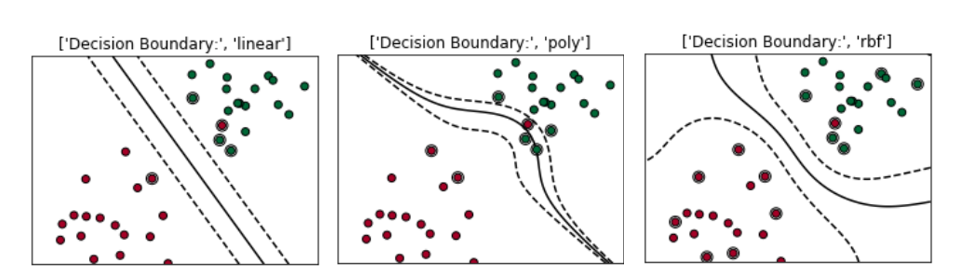

# ✳️ Import Libraries

In [70]:
#Dataframe
import pandas as pd
#mathematical compute
import numpy as np
#data splitting
from sklearn.model_selection import train_test_split

#model
from sklearn.svm import SVC

#visual representation of decision boundaries aiding in the interpretation and comparison of classification models.
from mlxtend.plotting import plot_decision_regions

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#accuracy amd model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix

In [71]:
#load dataset
df1 = pd.read_csv("/content/drive/MyDrive/CyberSecurity with AI /datasets-email spam and phishing/sms_spam_svm.csv")
df1.head(5)

,type,suspect,neutral
0,ham,1,3
1,ham,49,30
2,spam,47,32
3,ham,46,31
4,ham,0,36


In [81]:
#features
X = df1.drop(['type'], axis =1)
print(f"shape of featues: {X.shape}")
#target
y = df1['type'].replace({'ham': 0, 'spam': 1})
print(f"values of different classes in target variable: {y.value_counts()}")
#numeric coversion
y_encoded = np.where(y == "ham", 0, 1)




shape of featues: (150, 2)
values of different classes in target variable: type
0    124
1     26
Name: count, dtype: int64


In [82]:
#Data splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42, stratify = y_encoded)

print(f'shape of train data: {X_train.shape}')
print(f'shape of test data: {X_test.shape}')

shape of train data: (105, 2)
shape of test data: (45, 2)


In [83]:
#build model
# Kernel: Type of kernel function (linear, polynomial, rbf etc.)
#C: Regularization parameter (float) Larger C - small margin, Smaller C - large margin
#C = inverse regularization parameter(1/λ); higher C = overfitting and lower C= underfitting

svc = SVC(kernel = 'linear', C = 1.0, random_state = 42)
svc.fit(X_train, y_train)

#predict
y_pred = svc.predict(X_test)

print(f"predicted value of test data: {y_pred}")

predicted value of test data: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


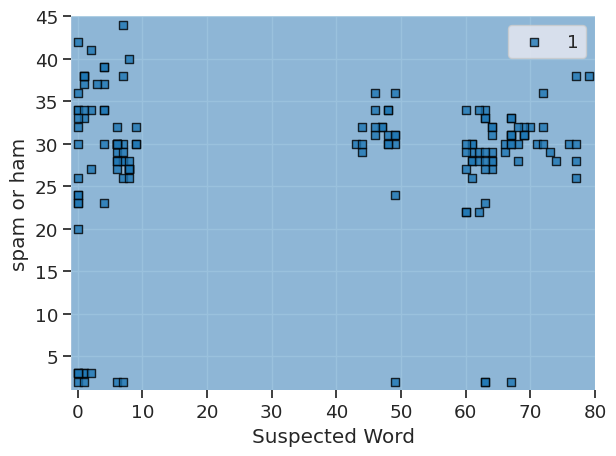

In [84]:
#decision boundary visualization

#combining train and test data
#X_combined = np.concatenate((X_train, X_test), axis=0).astype(int)
#y_combined = np.hstack((y_train, y_test))

# Assuming y_combined contains labels "ham" and "spam"
y_encoded = np.where(y == "ham", 0, 1)
# Plotting decision regions
plot_decision_regions(X.values, y_encoded, clf=svc, legend=3)

#plot_decision_regions(X_combined, y_combined_encoded, clf = svc, legend = 3)
plt.xlabel("Suspected Word")
plt.ylabel('spam or ham')
plt.legend(loc="upper right")
#plt.legend(["ham", "spam"], loc="upper right", markerscale=1.5)
plt.tight_layout()
plt.show()





In [85]:
accuracy = accuracy_score(y_test, y_pred)
print(f'misclassified samples: {(y_test!=y_pred).sum()}')
print(f"accuracy score: {accuracy: .2%}")

misclassified samples: 5
accuracy score:  88.89%


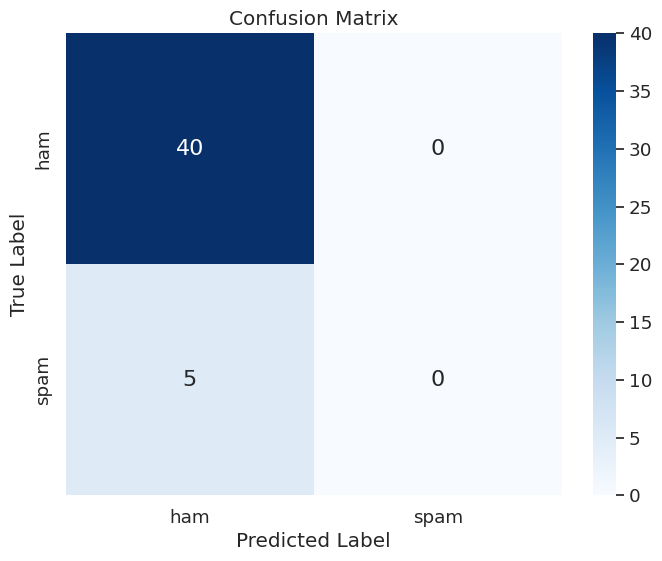

In [86]:
# Mapping dictionary for integer labels to categories
label_map = {0: "ham", 1: "spam"}

# Replace integer labels with categories for y_test and y_pred
y_test_categories = np.array([label_map[label] for label in y_test])
y_pred_categories = np.array([label_map[label] for label in y_pred])

# Get unique classes from true and predicted labels and convert them to a list of strings
classes = np.unique(np.concatenate((y_test_categories, y_pred_categories)))

# Compute confusion matrix
cm = confusion_matrix(y_test_categories, y_pred_categories, labels=classes)

# Create a DataFrame for confusion matrix
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**📌 Key Notes:**

- Content-based filtering for spam email involves analyzing the textual content, attachments, image content and metadata of emails to classify them as spam or non-spam. 📧

- Non-content-based filtering employs features like sender reputation, email headers, and behavioral patterns to identify spam, without analyzing email content directly. 🛡️

# 😡Spam Detection with Linear Regression model(Supervised Machine Learning)


**Linear Regression 📈:** is a statistical method to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data, used for **predicting continuous outcomes**.

**For spam detection**, Linear Regression can be applied to features extracted from email metadata, such as sender information, email length, and frequency of certain words, to predict the likelihood of an email being spam based on these features. However, Linear Regression might **not be the most suitable model** for this task as it's primarily designed for continuous target variables, whereas **spam detection typically involves binary classification (ham or spam)**.

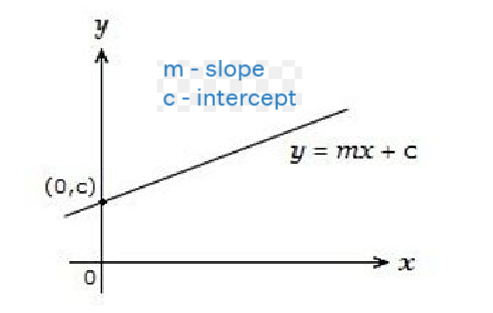

# ✳️ Import Libraries

In [87]:
#Dataframe
import pandas as pd
#mathematical compute
import numpy as np
#data splitting
from sklearn.model_selection import train_test_split

#model
from sklearn.linear_model import LinearRegression

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:
df = pd.read_csv("/content/drive/MyDrive/CyberSecurity with AI /datasets-email spam and phishing/sms_spam_perceptron.csv")
df.head(5)

,type,sex,buy
0,ham,0,1
1,ham,0,1
2,ham,1,1
3,spam,1,0
4,ham,0,1


In [89]:
#features
X = df.drop(['type'], axis =1)
print(f"shape of featues: {X.shape}")
#target
y = df['type'].replace({'ham': 0, 'spam': 1})
print(f"values of different classes in target variable: {y.value_counts()}")

shape of featues: (99, 2)
values of different classes in target variable: type
0    75
1    24
Name: count, dtype: int64


In [90]:
#data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

print(f'shape of train data: {X_train.shape}')
print(f'shape of test data: {X_test.shape}')


shape of train data: (69, 2)
shape of test data: (30, 2)


In [91]:
# build model

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

#model prediction
y_pred = linear_regression.predict(X_test)
print(f"predicted values on test data: {y_pred}")


#print(f'misclassified samples: {(y_test!=y_pred).sum()}')
print(f"linear regression accuracy score: {linear_regression.score(X_train, y_train): .2%}")

predicted values on test data: [0.57065804 0.57065804 0.59385113 0.57065804 0.00431499 0.00431499
 0.00431499 1.16019417 0.00431499 0.57065804 0.00431499 0.00431499
 0.57065804 0.00431499 0.00431499 0.00431499 0.00431499 0.00431499
 0.00431499 0.00431499 0.57065804 0.00431499 0.00431499 0.00431499
 0.00431499 0.02750809 0.00431499 0.00431499 0.57065804 1.16019417]
linear regression accuracy score:  52.78%


# 😡 Spam Detection with Logistic Regression model(Supervised Machine Learning)


**Logistic Regression: 📈** Statistical method used for binary classification by modeling the probability of a categorical outcome based on predictor variables.

**For email spam detection**, Logistic Regression can analyze features such as email metadata and content to predict the likelihood of an email being spam (1) or not spam (0) based on these features.

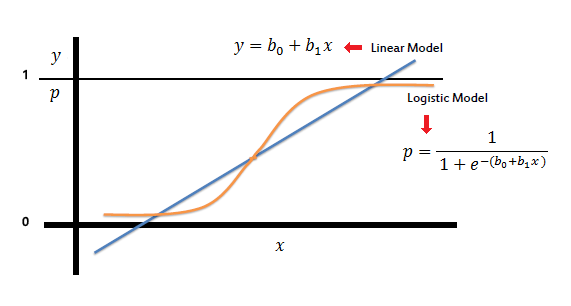

# ✳️ Import Libraries

In [92]:
#Dataframe
import pandas as pd
#mathematical compute
import numpy as np
#data splitting
from sklearn.model_selection import train_test_split

#model
from sklearn.linear_model import LogisticRegression

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#accurace
from sklearn.metrics import accuracy_score
#confusion metrics
from sklearn.metrics import confusion_matrix


In [94]:
#import dataset

phishing_data = pd.read_csv("/content/drive/MyDrive/CyberSecurity with AI /datasets-email spam and phishing/phishing_dataset.csv", header = None)


# Column names
phishing_data_final = phishing_data.copy()

phishing_data_final.columns = [f"col{i}" for i in range(len(phishing_data.columns))]

# Create DataFrame
phishing_data_final.head(7)

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1


In [95]:
#features
X = phishing_data_final.drop(['col30'], axis = 1)
print(f"shape of featues: {X.shape}")
#target
y = phishing_data_final['col30']
print(f"values of different classes in target variable: {y.value_counts()}")


shape of featues: (11055, 30)
values of different classes in target variable: col30
 1    6157
-1    4898
Name: count, dtype: int64


In [96]:
# data splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, stratify = y)
print(f'shape of train data: {X_train.shape}')
print(f'shape of test data: {X_test.shape}')

print(f"values of y_train classes: {y_train.value_counts()}")
print(f"values of y_test classes: {y_test.value_counts()}")




shape of train data: (7738, 30)
shape of test data: (3317, 30)
values of y_train classes: col30
 1    4310
-1    3428
Name: count, dtype: int64
values of y_test classes: col30
 1    1847
-1    1470
Name: count, dtype: int64


In [97]:
#model build
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

#predict
y_pred = log_model.predict(X_test)

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'misclassified samples: {(y_test!=y_pred).sum()}')
print(f"accuracy score: {accuracy: .2%}")


misclassified samples: 239
accuracy score:  92.79%


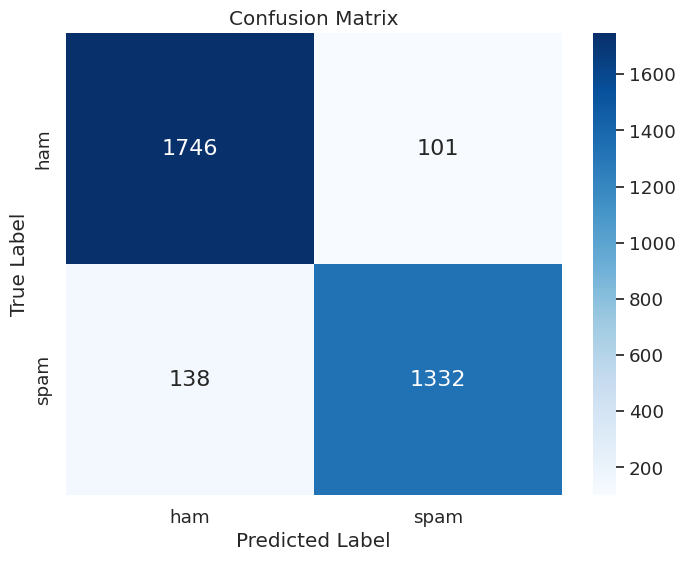

In [98]:
# Mapping dictionary for integer labels to categories
label_map = {1: "ham", -1: "spam"}

# Replace integer labels with categories for y_test and y_pred
y_test_categories = np.array([label_map[label] for label in y_test])
y_pred_categories = np.array([label_map[label] for label in y_pred])

# Get unique classes from true and predicted labels and convert them to a list of strings
classes = np.unique(np.concatenate((y_test_categories, y_pred_categories)))

# Compute confusion matrix
cm = confusion_matrix(y_test_categories, y_pred_categories, labels=classes)

# Create a DataFrame for confusion matrix
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 😡 Spam Detection with Decision Tree model(Supervised Machine Learning)

**Decision Tree: 🌳** Supervised learning algorithm that partitions data into subsets based on feature values, aiming to create a tree-like structure to predict the target variable's value for new data points.
 - 🎃 Trees recursively split data based on true/false conditions, aiming to minimize impurity until reaching leaf nodes.

- Root Node: Represents the entire dataset and is the starting point for the tree. It contains the feature that best splits the data. This process is typically performed using a measure of impurity or information gain, such as Gini impurity or entropy.

- Branches: Represent the possible values of the chosen feature. Each branch leads to a child node.
- Leaf Nodes: Terminal nodes that represent the final outcome or prediction. They contain the predicted class label.

In spam detection, Decision Trees analyze email features recursively, making binary decisions at each node based on feature values (e.g., sender address, email content), eventually classifying emails as spam (🛑) or not spam (✉️).


- [Learn More About Decision Tree](https://link.springer.com/article/10.1023/A:1022643204877)

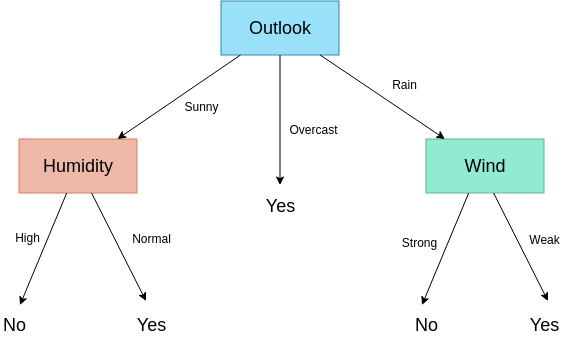

# ✳️ Import Libraries

In [99]:
#Dataframe
import pandas as pd
#mathematical compute
import numpy as np
#data splitting
from sklearn.model_selection import train_test_split

#for decision tree model
from sklearn import tree
#confusion metrics
from sklearn.metrics import confusion_matrix



In [100]:
#import dataset

phishing_data = pd.read_csv("/content/drive/MyDrive/CyberSecurity with AI /datasets-email spam and phishing/phishing_dataset.csv", header = None)


# Column names
phishing_data_final = phishing_data.copy()

phishing_data_final.columns = [f"col{i}" for i in range(len(phishing_data.columns))]

# Create DataFrame
phishing_data_final.head(7)

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1


In [102]:
#features
X = phishing_data_final.drop(['col30'], axis = 1)
print(f"shape of featues: {X.shape}")
#target
y = phishing_data_final['col30']
print(f"values of different classes in target variable: {y.value_counts()}")


shape of featues: (11055, 30)
values of different classes in target variable: col30
 1    6157
-1    4898
Name: count, dtype: int64


In [103]:
# data splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, stratify = y)
print(f'shape of train data: {X_train.shape}')
print(f'shape of test data: {X_test.shape}')

print(f"values of y_train classes: {y_train.value_counts()}")
print(f"values of y_test classes: {y_test.value_counts()}")




shape of train data: (7738, 30)
shape of test data: (3317, 30)
values of y_train classes: col30
 1    4310
-1    3428
Name: count, dtype: int64
values of y_test classes: col30
 1    1847
-1    1470
Name: count, dtype: int64


In [104]:
#build model
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

#predict
y_pred = tree_classifier.predict(X_test)

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'misclassified samples: {(y_test!=y_pred).sum()}')
print(f"accuracy score: {accuracy: .2%}")




misclassified samples: 125
accuracy score:  96.23%


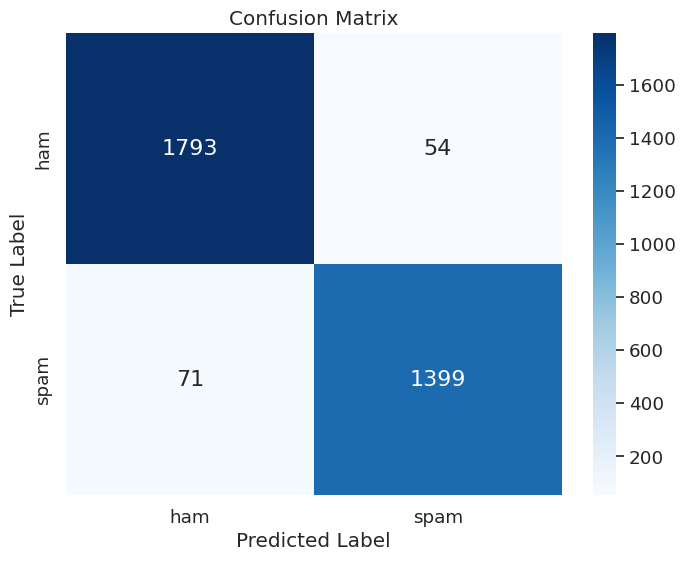

In [105]:
# Mapping dictionary for integer labels to categories
label_map = {1: "ham", -1: "spam"}

# Replace integer labels with categories for y_test and y_pred
y_test_categories = np.array([label_map[label] for label in y_test])
y_pred_categories = np.array([label_map[label] for label in y_pred])

# Get unique classes from true and predicted labels and convert them to a list of strings
classes = np.unique(np.concatenate((y_test_categories, y_pred_categories)))

# Compute confusion matrix
cm = confusion_matrix(y_test_categories, y_pred_categories, labels=classes)

# Create a DataFrame for confusion matrix
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**📌note:** Decision Trees can overfit noisy data, especially when the tree is deep and complex, leading to poor generalization on unseen data. They may also struggle with learning complex relationships and can be sensitive to small variations in the training data, impacting stability and interpretability. Regularization techniques and ensemble methods like Random Forests can mitigate these limitations.

# 😡 Spam Message (NLP)Detection with Naive Bayes model(Supervised Machine Learning)


**Naive Bayes 📧✉️** is a Probabilistic classifier that assumes independence between features and predicts the probability of a class given input features based on Bayes' theorem.

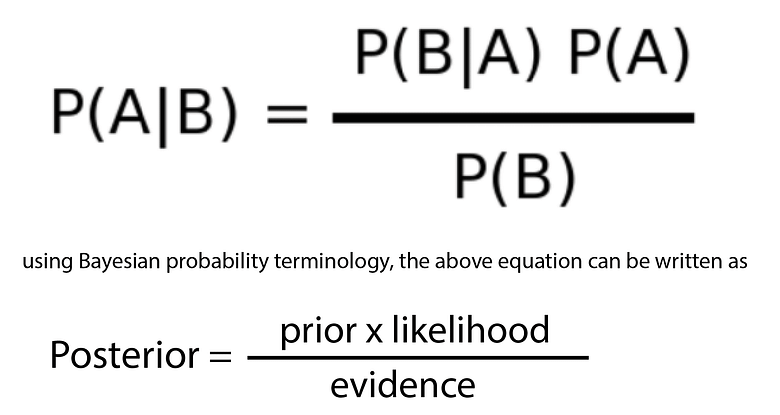

📌Example: Imagine you're a teacher trying to predict whether a student will pass or fail a test based on two features: hours studied and attendance. Naive Bayes assumes that these features are independent, so the probability of passing or failing is calculated separately for each feature. For instance, if historically students who study a lot tend to pass regardless of attendance, Naive Bayes would predict a higher probability of passing for a student who studied many hours, even if their attendance was low.

In spam detection, Naive Bayes analyzes the probability of an email being spam or not spam by considering the occurrence of certain words or features in the email content. For instance, it calculates the likelihood of an email being spam given the presence of words like "free" or "offer", utilizing probabilities to classify emails accurately.

[Watch Video to know more about Naive Bayes](https://www.youtube.com/watch?v=ny1egBSrsTc)

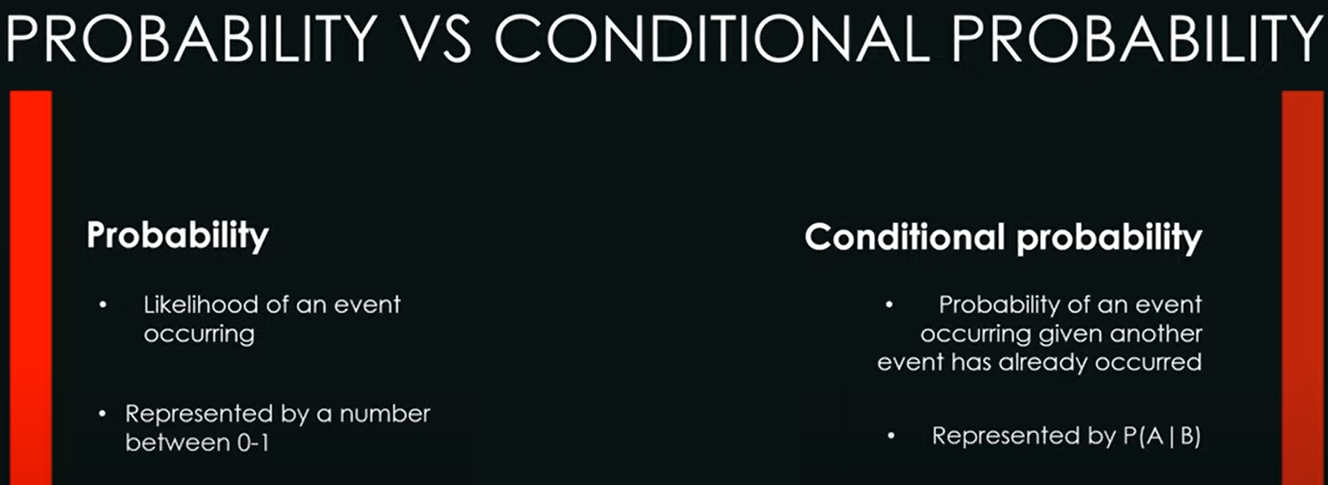

# 💥 Types of Naive Bayes
- Guassian Naive Bayes: Normal/contineous distribution, can be used in income classification where value is contineous
- Multinomial Navie Bayes: Discrete Count Data, NLP (spam filtering / sentiment analysis)
-Bernoulli Naive Bayes: Use for Binary / Boolean data. Only two outcomes. (Text Classification, NLP)

  - - Spam Filtering 🎋
  - - Sentiment Analysis 🎋
  - - Medical Diagonise 🎋
  - - Image Recognation 🎋
  - - Fraud Detection 🎋


# 👊 Steps of Spam Messaging (NLP) Detection with Naive Bayes

1. Lemmatization
2. TfIdf
3. Apply Naive Bayes
4. Prediction

- NLP (Natural Language Processing): 🗣️🤖 Field of study focusing on the interaction between computers and human language, enabling machines to understand, interpret, and generate human language.
- NLTK (Natural Language Toolkit): 📚🗣️ A leading platform for building Python programs to work with human language data, providing easy-to-use interfaces to over 50 corpora and lexical resources.
- Tokenization: 🧩 Process of breaking text into smaller units (tokens) such as words or sentences, facilitating analysis and processing in NLP tasks.
- BOW (Bag of Words): 🎒 Representation of text data as a collection of word occurrences, disregarding grammar and word order, commonly used in document classification and information retrieval tasks in NLP.
- Lemmatization: 📖🔡 A linguistic process that reduces words to their base or dictionary form (lemmas), aiding in text normalization and improving the accuracy of natural language processing tasks.
- TF-IDF (Term Frequency-Inverse Document Frequency): 📊📉 A statistical measure that evaluates the importance of a word in a document relative to a collection of documents, by multiplying its frequency (TF) by the inverse document frequency (IDF). It's commonly used for text mining and information retrieval tasks.

# ✳️ Import Libraries

In [106]:
#visualization
import matplotlib.pyplot as plt

#csv file
import csv

#text
from textblob import TextBlob

#dataframe
import pandas as pd

#sklearn
import sklearn

#mathematical computation
import numpy as np

#for NLP
import nltk
nltk.download('punkt')
nltk.download('wordnet')

# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#naive bayes as it is text we are using Multinomial
from sklearn.naive_bayes import MultinomialNB
#model accuracy and evaluation
from sklearn.metrics import classification_report, accuracy_score
#confusion metrics
from sklearn.metrics import confusion_matrix

#data spliting
from sklearn.model_selection import train_test_split

#tokenization and lemmatizatiom
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [123]:
# Load data
sms = pd.read_csv("/content/drive/MyDrive/CyberSecurity with AI /datasets-email spam and phishing/sms_spam_no_header.csv", header=None)

# Rename columns
sms = sms.rename(columns={0: "type", 1: "text"})

# Shape of dataset
print(f"Shape of dataset: {sms.shape}")
print(f"Count of ham and spam:\n{sms['type'].value_counts()}")  # Corrected typo

# Display first 5 rows
sms.head(5)

Shape of dataset: (5574, 2)
Count of ham and spam:
type
ham     4827
spam     747
Name: count, dtype: int64


,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [122]:
#ham text
sms[sms['type']=='ham']

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5567,ham,Huh y lei...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [121]:
#spam text
sms[sms['type']=='spam']

,type,text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5539,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5542,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5549,spam,Had your contract mobile 11 Mnths? Latest Moto...
5568,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [124]:
#Data Splitting

X_train, X_test, y_train, y_test = train_test_split( sms['text'], sms['type'],
                                                    test_size = 0.3, random_state =42, stratify = sms['type'])


print(f'shape of train data: {X_train.shape}')
print(f'shape of test data: {X_test.shape}')

print(f"values of y_train classes: {y_train.value_counts()}")
print(f"values of y_test classes: {y_test.value_counts()}")

shape of train data: (3901,)
shape of test data: (1673,)
values of y_train classes: type
ham     3378
spam     523
Name: count, dtype: int64
values of y_test classes: type
ham     1449
spam     224
Name: count, dtype: int64


# Lemmatization/BOW and TfIdf

In [125]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define custom analyzer function with lemmatization
def lemmatize_analyzer(text):
    tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmas

In [126]:
lemmatize_analyzer

<function __main__.lemmatize_analyzer(text)>

In [127]:
# Apply CountVectorizer with custom analyzer for lemmatization
bow = CountVectorizer(analyzer=lemmatize_analyzer).fit(X_train)

sms_bow = bow.transform(X_train)

#apply tfidf

tfidf = TfidfTransformer().fit(sms_bow)

sms_tfidf = tfidf.transform(sms_bow)

In [128]:
#model build
spam_detector = MultinomialNB().fit(sms_tfidf, y_train)

In [129]:
# Check sms for prediction
selected_index = 20
msg = sms['text'][selected_index]

# Vectorization
msg_bow = bow.transform([msg])  # Pass msg as a list containing one message

# TF-IDF
msg_tfidf = tfidf.transform(msg_bow)

#print predicted output of this message
print(f"result of predicted output of {selected_index}th value: {spam_detector.predict(msg_tfidf)[0]}")

print(f"actual output: {sms.type[20]}")

result of predicted output of 20th value: ham
actual output: ham


In [130]:
# test data transformation
# Vectorization
test_bow = bow.transform(X_test)

# TF-IDF
test_tfidf = tfidf.transform(test_bow)



In [131]:
#prediction
y_pred = spam_detector.predict(test_tfidf)

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'misclassified samples: {(y_test!=y_pred).sum()}')
print(f"accuracy score: {accuracy: .2%}")


misclassified samples: 85
accuracy score:  94.92%


In [132]:
print(f"classification report: \n {classification_report(y_test, y_pred)}")

classification report: 
               precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1449
        spam       1.00      0.62      0.77       224

    accuracy                           0.95      1673
   macro avg       0.97      0.81      0.87      1673
weighted avg       0.95      0.95      0.94      1673



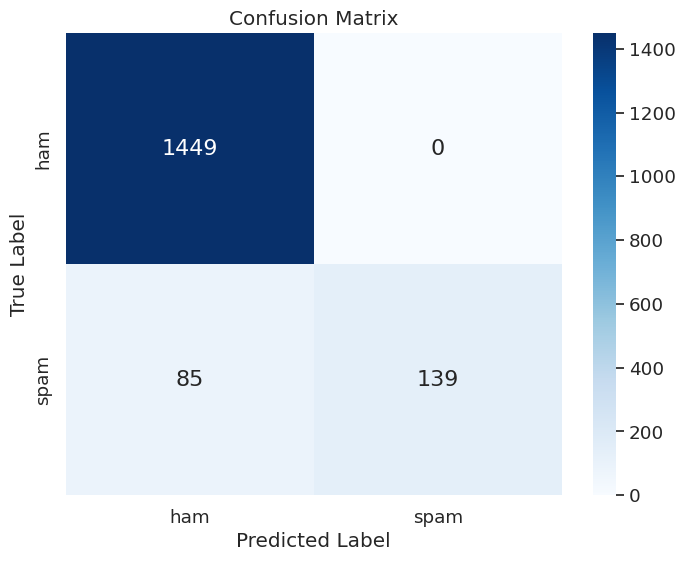

In [133]:

#confusion matrix

# Get unique classes from true and predicted labels and convert them to a list of strings
classes = np.unique(np.concatenate((y_test, y_pred)))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=classes)

# Create a DataFrame for confusion matrix
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 👽 Summary

SMS and email spam detection is critical for safeguarding users against phishing attacks, malware distribution, and fraudulent activities. Machine learning and artificial intelligence techniques enable automated analysis of message content, sender behavior, and metadata to accurately identify and filter out spam, thereby enhancing cybersecurity defenses and protecting user privacy and security.